In [33]:
import sent2vec
import glob
from multiprocessing import Pool
import sys
import os
import re
import codecs
import nltk.data
from nltk.tokenize import TweetTokenizer
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
data_path  = '/longterm/kaijil/data/10715/'
model_path = data_path + 'models/'
print(model_path)

/longterm/kaijil/data/10715/models/


## Bias

In [2]:
# model_wi_1 = sent2vec.Sent2vecModel()
# model_wi_1.load_model(model_path + 'wiki_unigrams.bin')
model_wi_2 = sent2vec.Sent2vecModel()
model_wi_2.load_model(model_path + 'wiki_bigrams.bin')
# model_tw_1 = sent2vec.Sent2vecModel()
# model_tw_1.load_model(model_path + 'twitter_unigrams.bin')


In [3]:
model_tw_2 = sent2vec.Sent2vecModel()
model_tw_2.load_model(model_path + 'twitter_bigrams.bin')

In [7]:
# model_tb_1 = sent2vec.Sent2vecModel()
# model_tb_1.load_model(model_path + 'torontobooks_unigrams.bin')
model_tb_2 = sent2vec.Sent2vecModel()
model_tb_2.load_model(model_path + 'torontobooks_bigrams.bin')
# model_gb_2 = sent2vec.Sent2vecModel()
# model_gb_2.load_model(model_path + 'gutenbergbooks_bigrams.bin')

In [23]:
# t1 = "Ted Cruz should be disqualified from his fraudulent win in Iowa. Weak RNC and Republican leadership probably won't let this happen! Sad."
# t2 = "I wonder if President Obama would have attended the funeral of Justice Scalia if it were held in a Mosque? Very sad that he did not go!"
t1 = "Kevin Stitt ran a great winning campaign against a very tough opponent in Oklahoma. Kevin is a very successful businessman who will be a fantastic Governor. He is strong on Crime & Borders, the 2nd Amendment, & loves our Military & Vets. He has my complete and total Endorsement!"
t2 = "To the incredible people of the Great State of Wyoming: Go VOTE TODAY for Foster Friess - He will be a fantastic Governor! Strong on Crime, Borders & 2nd Amendment. Loves our Military & our Vets. He has my complete and total Endorsement!"

In [17]:
print(get_similarity(t1,t2,model_wi_1))
print(get_similarity(t1,t2,model_wi_2))
print(get_similarity(t1,t2,model_tw_1))
print(get_similarity(t1,t2,model_tw_2))
print(get_similarity(t1,t2,model_tb_1))
print(get_similarity(t1,t2,model_tb_2))
print(get_similarity(t1,t2,model_gb_2))

NameError: name 'model_wi_1' is not defined

## Bias in Sentence Embeddings

In [45]:
def plot_feature_map(model,feature,races):
    heatmap = np.zeros((len(feature),len(races)))
    for f in range(len(feature)):
        for r in range(len(races)):
            heatmap[f,r] = get_similarity(feature[f],races[r],model)
    print(heatmap)
    fig, ax = plt.subplots(figsize=(10,10))  
    sns.heatmap(heatmap,xticklabels=races,yticklabels=feature,ax = ax)
    
    plt.show()
    return heatmap


(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
[[ 0.113  0.094  0.055  0.059]
 [ 0.085  0.074  0.034  0.083]
 [ 0.026  0.062  0.016 -0.002]]


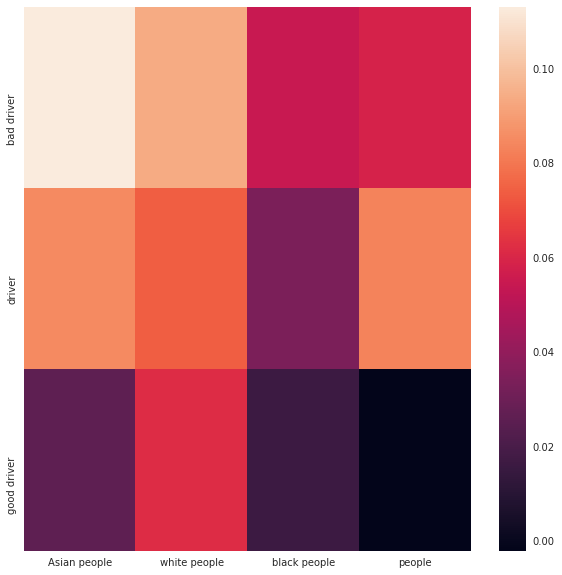

(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
[[0.045 0.089 0.071 0.06 ]
 [0.057 0.06  0.046 0.069]
 [0.066 0.082 0.06  0.067]]


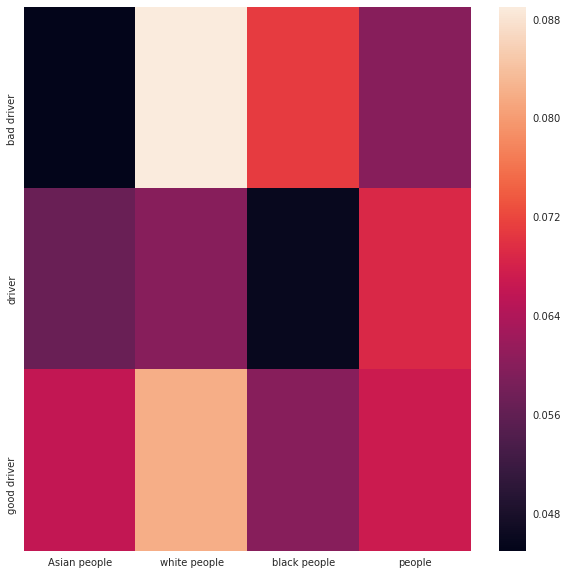

array([[0.045, 0.089, 0.071, 0.06 ],
       [0.057, 0.06 , 0.046, 0.069],
       [0.066, 0.082, 0.06 , 0.067]])

In [55]:
driving_feature = ['bad driver','driver','good driver']
races = ['Asian people','white people','black people','people']
plot_feature_map(model_tw_2,driving_feature,races)
plot_feature_map(model_wi_2,driving_feature,races)

(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
[[ 0.14   0.041  0.091  0.052]
 [ 0.025  0.031  0.059  0.027]
 [ 0.036  0.041  0.047 -0.022]
 [ 0.051  0.063  0.104 -0.004]]


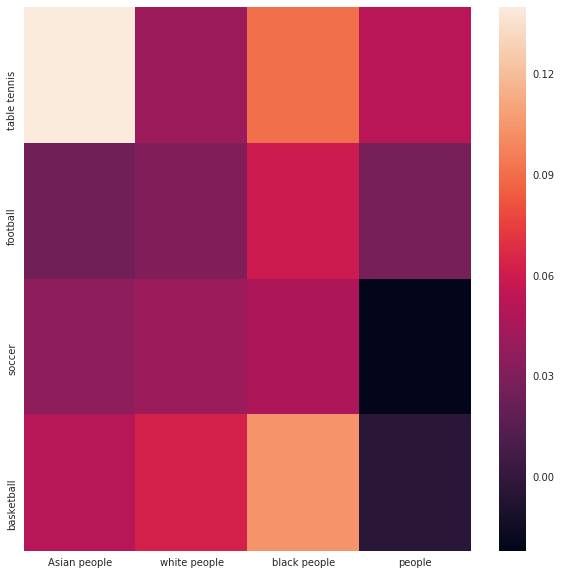

array([[ 0.14 ,  0.041,  0.091,  0.052],
       [ 0.025,  0.031,  0.059,  0.027],
       [ 0.036,  0.041,  0.047, -0.022],
       [ 0.051,  0.063,  0.104, -0.004]])

In [64]:
other_feature = ['table tennis','football','soccer','basketball']
races = ['Asian people','white people','black people','people']
plot_feature_map(model_tw_2,other_feature,races)

(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
(1, 1)
[[0.18000001 0.13       0.13699999 0.046     ]
 [0.122      0.125      0.14399999 0.048     ]]


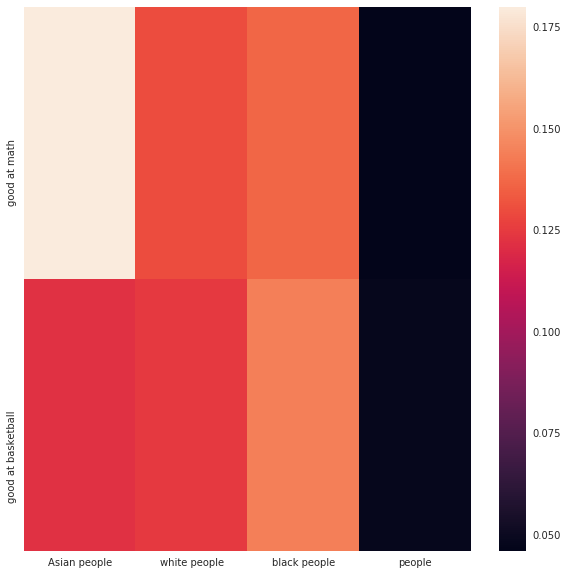

array([[0.18000001, 0.13      , 0.13699999, 0.046     ],
       [0.122     , 0.125     , 0.14399999, 0.048     ]])

In [74]:
other_feature = ['good at math','good at basketball']
races = ['Asian people','white people','black people','people']
plot_feature_map(model_tw_2,other_feature,races)